In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.insert(1, sys.path[0].replace('tests', 'src'))
from polynomial_regression import PolynomialRegressor

In [44]:
data = [(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]

In [4]:
linear_regression = PolynomialRegressor()
linear_regression.fit(data, 1)
quadratic_regression = PolynomialRegressor()
quadratic_regression.fit(data, 2)
seventh_deg_regression = PolynomialRegressor()
seventh_deg_regression.fit(data, 7)

In [5]:
x = range(0, 201)
x = [x_val / 10 for x_val in x]
linear_regression_points = [linear_regression.predict(x_val) for x_val in x]
quadratic_regression_points = [quadratic_regression.predict(x_val) for x_val in x]
seventh_regression_points = [seventh_deg_regression.predict(x_val) for x_val in x]


(-20.0, 300.0)

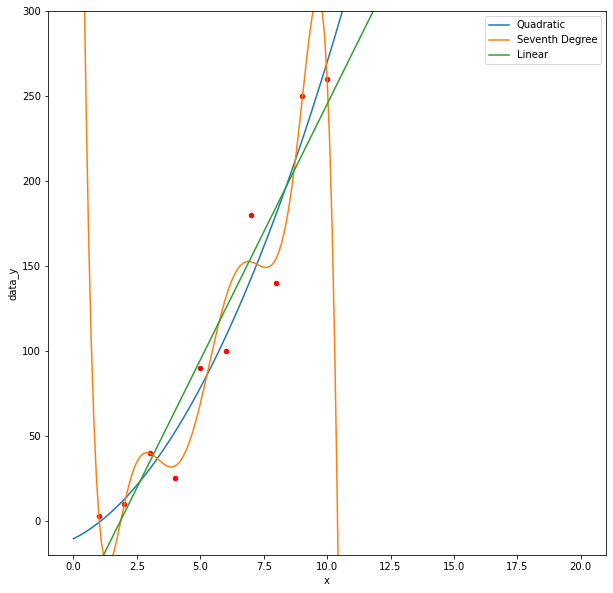

In [6]:
data_y = [point[1] for point in data]
data_x = [point[0] for point in data]
original_df = pd.DataFrame({'data_y': data_y, 'data_x': data_x})
original_points = original_df.plot(x='data_x', y='data_y', kind='scatter', figsize=(10, 10), color='red')
points = pd.DataFrame(
    {'x': x, '1': linear_regression_points, '2': quadratic_regression_points, '7': seventh_regression_points})
quadratic_plot = points.plot(x='x', y='2', ax=original_points, label='Quadratic')
seventh_deg_plot = points.plot(x='x', y='7', ax=quadratic_plot, label='Seventh Degree')
points.plot(x='x', y='1', ax=seventh_deg_plot, label='Linear').set_ylim(-20, 300)

{'Linear Regression': 7182.618181818181, 'Quadratic Regression': 4948.913636363637, '7th Degree Regression': 2458.766803786634}


<AxesSubplot:>

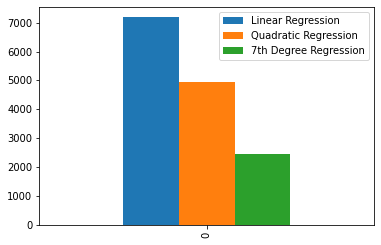

In [25]:
rss_dict = {'Linear Regression': 0, 'Quadratic Regression': 0, '7th Degree Regression': 0}
for point in data:
    rss_dict['Linear Regression'] += (point[1] - linear_regression.predict(point[0])) ** 2
    rss_dict['Quadratic Regression'] += (point[1] - quadratic_regression.predict(point[0])) ** 2
    rss_dict['7th Degree Regression'] += (point[1] - seventh_deg_regression.predict(point[0])) ** 2
print(rss_dict)
bruh = pd.DataFrame(rss_dict, index=[0])
bruh.plot(kind="bar")

In [46]:
rss_dict = {'Linear Regression': 0,
            'Quadratic Regression': 0, '7th Degree Regression': 0}
for i in range(len(data)):
    current_point = data[i]
    data.pop(i)
    print(data)
    regressor = PolynomialRegressor()
    regressor.fit(data, 1)
    rss_dict['Linear Regression'] += (current_point[1] - regressor.predict(current_point[0])) ** 2

    regressor.fit(data, 2)
    rss_dict['Quadratic Regression'] += (current_point[1] - regressor.predict(current_point[0]))** 2

    regressor.fit(data, 7)
    rss_dict['7th Degree Regression'] += (current_point[1] -regressor.predict(current_point[0])) ** 2
    data.insert(i, current_point)
print(rss_dict)

[(2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]
[(1, 3), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]
[(1, 3), (2, 10), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]
[(1, 3), (2, 10), (3, 40), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]
[(1, 3), (2, 10), (3, 40), (4, 25), (6, 100), (7, 180), (8, 140), (9, 250), (10, 260)]
[(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (7, 180), (8, 140), (9, 250), (10, 260)]
[(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (8, 140), (9, 250), (10, 260)]
[(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (9, 250), (10, 260)]
[(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (10, 260)]
[(1, 3), (2, 10), (3, 40), (4, 25), (5, 90), (6, 100), (7, 180), (8, 140), (9, 250)]
{'Linear Regression': 11343.913602157705, 'Quadratic Regression': 8472.892156002152, '7th Degree Regression': 2621050.030380025}


<AxesSubplot:>

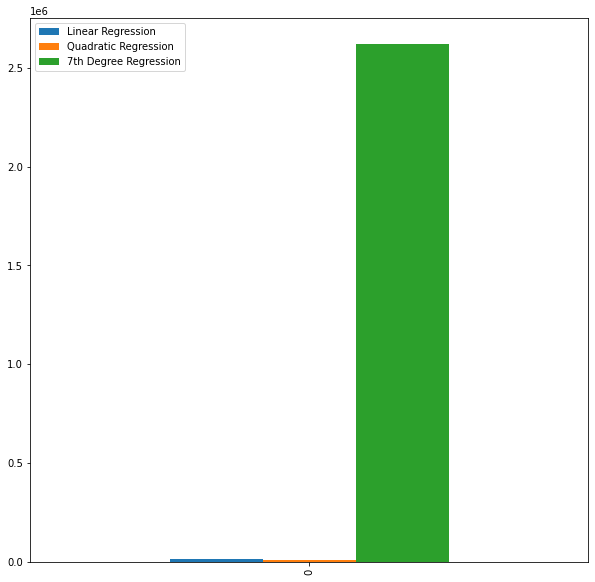

In [48]:
valid_df = pd.DataFrame(rss_dict, index=[0])
valid_df.plot(kind='bar', figsize=(10, 10))